In [3]:
# sklearn에서 제공하는 데이터 셋 사용
import pandas as pd
import warnings 
# 불필요한 경고 출력 방지
warnings.filterwarnings('ignore')


In [4]:
from sklearn.datasets import load_iris

In [5]:
# iris 데이터셋을 로드합니다.
iris = load_iris()

- DESCR: 데이터셋의 정보를 보여줌
- data: feature data
- feature_names: feature data의 컬럼 이름
- target: label data(수치형)
- target_names: label의 이름(문자형)


In [6]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [8]:
data = iris['data'] # feature가 4개인 데이터
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# feature_names
- sepal: 꽃 받침
- petal: 꽃잎

In [11]:
feature_names = iris['feature_names']
feature_names # feature 별 이름을 볼 수 있다.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [14]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 데이터프레임 만들기

In [17]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [18]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df_iris['target'] = iris['target']

In [57]:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# 시각화

시각화

* scatterplot은 산점도

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

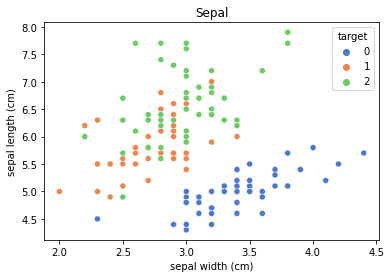

In [56]:
sns.scatterplot(x='sepal width (cm)', y='sepal length (cm)',
hue="target", palette='muted', data=df_iris) # 산점도 그릴때 있는 값 x, y축 제대로 column 명 기입 주의
# hue는 표시 모니터링 하는 것을 보여줌 
plt.title('Sepal')
plt.show()

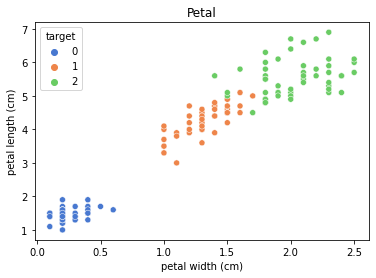

In [58]:
sns.scatterplot(x='petal width (cm)', y='petal length (cm)',
hue="target", palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

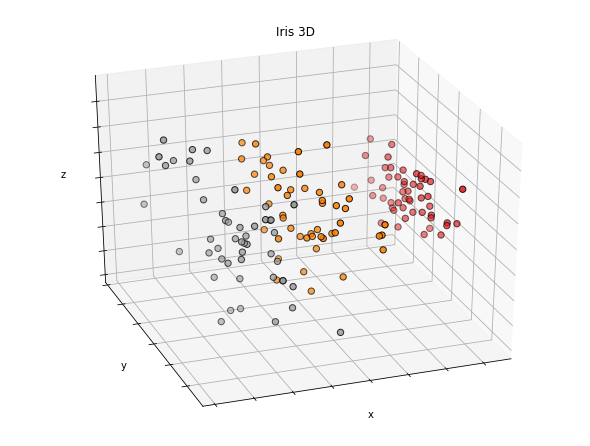

In [64]:
# 3D Graph
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110) # 3D 공간을 그림
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1)) # 차원 축소

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'], cmap=plt.cm.Set1, edgecolor='k',
s=40)

ax.set_title('Iris 3D')
ax.set_xlabel('x')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('y')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('z')
ax.w_zaxis.set_ticklabels([])

plt.show()